In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
X_level = pd.Series([1,2,3,4,5,6,7,8,9,10])
y_salary = ([45,50,60,80,111,150,200,300,500,1000])

In [5]:
#X_level = X_level.values.reshape(-1,1)
drtmv = DecisionTreeRegressor(random_state=0)
drtmv.fit(X_level, y_salary)

DecisionTreeRegressor(random_state=0)

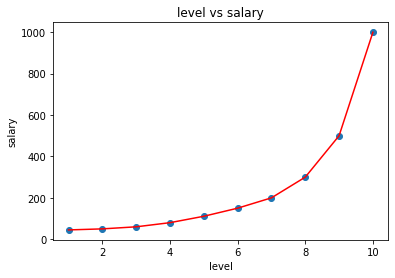

In [8]:
y_predict_salary = drtmv.predict(X_level)
plt.plot(X_level, y_predict_salary, color='red')

plt.title('level vs salary')
plt.xlabel('level')
plt.ylabel('salary')
plt.scatter(X_level, y_salary)

In [11]:
from sklearn.tree import export_graphviz
export_graphviz(drtmv, out_file='tree.dot', feature_names=['level'])

In [12]:
import sklearn.datasets
dsBoston = sklearn.datasets.load_boston()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [13]:
X_features = dsBoston.data
y_price = dsBoston.target


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_price, test_size=0.2, random_state=42)


In [16]:
dtrmBoston = DecisionTreeRegressor()
dtrmBoston.fit(X_train, y_train)

DecisionTreeRegressor()

In [17]:
y_expected = y_test
y_predicted = dtrmBoston.predict(X_test)

In [18]:
print('R2 Score: {}'.format(metrics.r2_score(y_expected, y_predicted)))

R2 Score: 0.8590316133638061


In [19]:
export_graphviz(dtrmBoston, out_file='treeBoston.dot', feature_names=dsBoston.feature_names)

In [21]:
y_predict = dtrmBoston.predict(X_features)
dfAP = pd.DataFrame({'Actual':y_price, 'Predicción':y_predict})
dfAP.head(10)

,Actual,Predicción
0,24.0,32.5
1,21.6,21.6
2,34.7,33.0
3,33.4,33.4
4,36.2,36.2
5,28.7,28.7
6,22.9,22.9
7,27.1,27.1
8,16.5,16.5
9,18.9,27.1


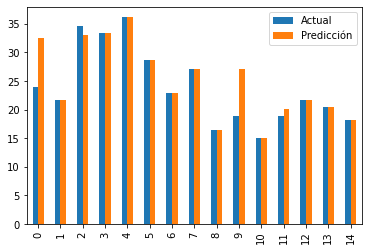

In [22]:
dfAP.head(15).plot(kind='bar')
plt.show()